c:\Users\AL MAKKAH\Desktop\Artificial intelligence lab\lab_env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Test MSE: 0.4076


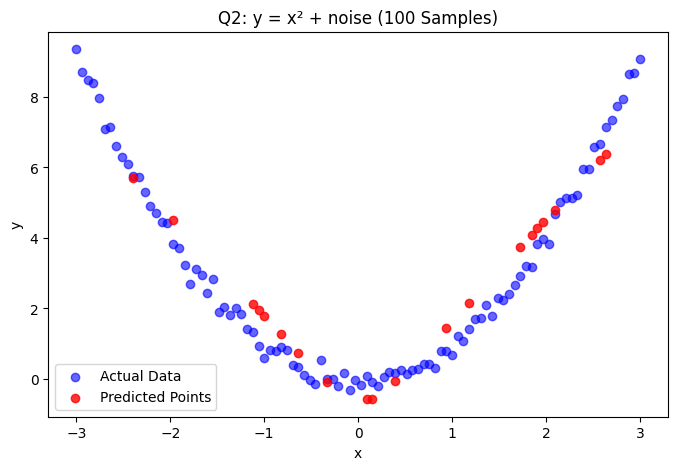


✅ Model successfully learns non-linear mapping y = x² + noise.
- Increasing hidden neurons or layers improves curve fitting.
- Too many neurons can cause overfitting.
- You can visualize better smoothness by increasing 'epochs' or neurons.



In [3]:
# Q2_Regression_100Samples.ipynb
# Regression Task – Neural Network learns y = x² + noise
# ------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# ------------------------------------------------------
# 1️⃣ Generate dataset of 100 samples
# ------------------------------------------------------
np.random.seed(0)
x = np.linspace(-3, 3, 100)                      # 100 points between -3 and 3
y = x**2 + np.random.normal(0, 0.2, size=x.shape) # add small Gaussian noise

# Reshape for model input
X = x.reshape(-1, 1)
Y = y.reshape(-1, 1)

# Split into training/testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# ------------------------------------------------------
# 2️⃣ Build Neural Network model
# ------------------------------------------------------
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(1,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# ------------------------------------------------------
# 3️⃣ Train model
# ------------------------------------------------------
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                    epochs=200, verbose=0)

# ------------------------------------------------------
# 4️⃣ Evaluate model
# ------------------------------------------------------
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Test MSE: {mse:.4f}")

# ------------------------------------------------------
# 5️⃣ Plot actual vs predicted results
# ------------------------------------------------------
plt.figure(figsize=(8,5))
plt.scatter(X, Y, label='Actual Data', color='blue', alpha=0.6)
plt.scatter(X_test, Y_pred, label='Predicted Points', color='red', alpha=0.8)
plt.title("Q2: y = x² + noise (100 Samples)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# ------------------------------------------------------
# 6️⃣ Discussion
# ------------------------------------------------------
print("""
✅ Model successfully learns non-linear mapping y = x² + noise.
- Increasing hidden neurons or layers improves curve fitting.
- Too many neurons can cause overfitting.
- You can visualize better smoothness by increasing 'epochs' or neurons.
""")